#   Titanic_Passenger_Analysis


Importing required resources

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning Process

Age values are crucial for analysis and many values as Null

In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C



# Exploratory Data Analysis

1.	What percentage of passengers survived?

In [37]:
Percentage_of_people_survived=(((df['Survived']==1).sum())/(df['Survived'].count()))*100
print(Percentage_of_people_survived)


38.38383838383838


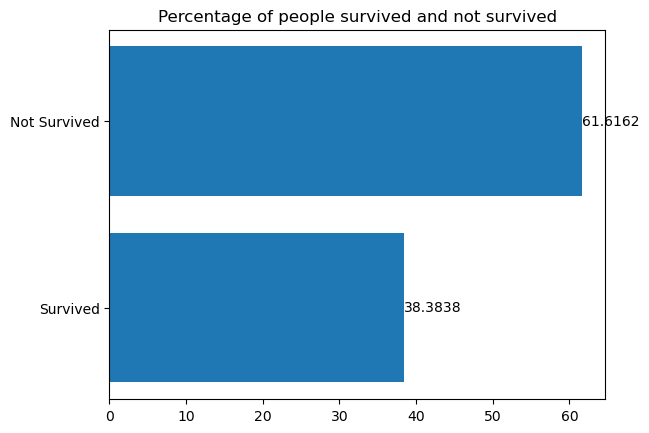

In [45]:
X_label=['Survived', 'Not Survived']
Y_label=[ Percentage_of_people_survived,100-Percentage_of_people_survived]
bars= plt.barh(X_label,Y_label)
plt.title('Percentage of people survived and not survived')
plt.bar_label(bars)
plt.show()

2.	Did gender affect survival chances?

In [57]:
df.groupby(['Sex', 'Survived']).size()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

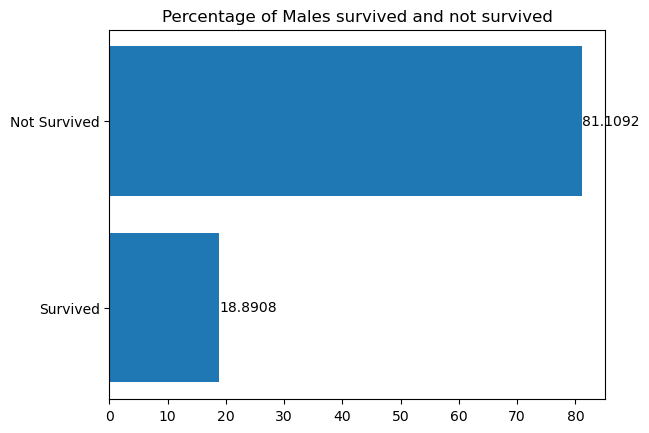

In [60]:
#Survival percentage of males

X_label=['Survived','Not Survived']
Y_label=[109/(4.68+1.09), 100 - 109/(4.68+1.09)]
bars= plt.barh(X_label,Y_label)
plt.title('Percentage of Males survived and not survived')
plt.bar_label(bars)
plt.show()

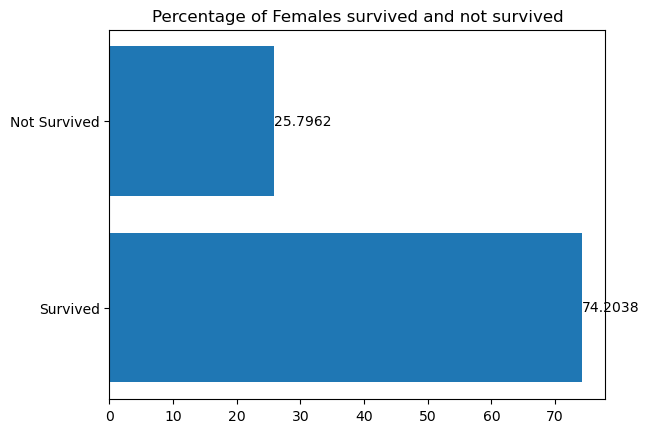

In [64]:
#Survival percentage of females

X_label=['Survived','Not Survived']
Y_label=[233/(2.33+0.81),100- 233/(2.33+0.81)]
bars= plt.barh(X_label,Y_label)
plt.title('Percentage of Females survived and not survived')
plt.bar_label(bars)
plt.show()

EDA revealed a striking gender bias: approximately 74% of female passengers survived compared to only 19% of males, reflecting historical evacuation policies rather than randomness

3.	Which passenger class had the highest survival rate?

In [102]:
df_new=(df.groupby(['Pclass','Survived']).size())
df_new

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [116]:
def percentage_survival_for_class(x) :
      percent= (df_new[x][1]/(df_new[x][0]+df_new[x][1]))*100
      return percent
Class_wise_survival_list=[]
for i in range(1,4) :
       Class_wise_survival_list.append(percentage_survival_for_class(i))


[np.float64(62.96296296296296), np.float64(47.28260869565217), np.float64(24.236252545824847)]


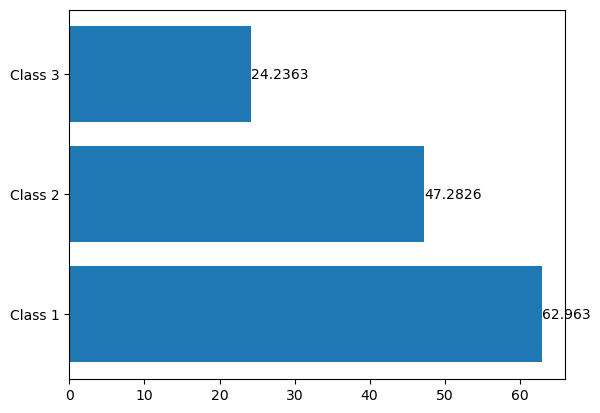

In [119]:
x_label=['Class 1', 'Class 2', 'Class 3']
bars=plt.barh(x_label,Class_wise_survival_list)
plt.bar_label(bars)
plt.show()

“First-class passengers had significantly higher survival due to proximity to lifeboats, fewer physical barriers, better access to information, and socio-economic privilege.”

4.	How does age affect survival?

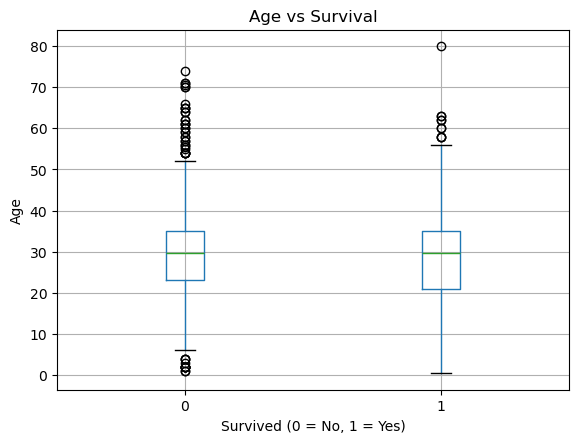

In [138]:
df.boxplot(column='Age', by='Survived')
plt.title('Age vs Survival')
plt.suptitle('')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

In [139]:
df[['Age', 'Survived']].corr()

,Age,Survived
Age,1.000000,-0.069809
Survived,-0.069809,1.000000


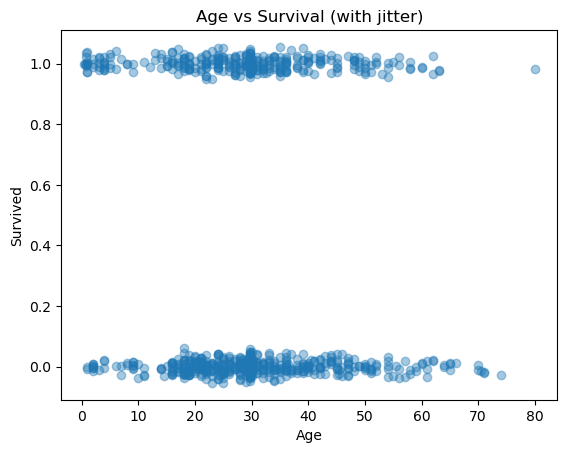

In [140]:
import numpy as np

plt.figure()
plt.scatter(
    df['Age'],
    df['Survived'] + np.random.normal(0, 0.02, size=len(df)),
    alpha=0.4
)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Age vs Survival (with jitter)')
plt.show()


In [142]:
bins = [0, 17, 58, 100]
labels = ['Children', 'Adults', 'Old Agers']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [143]:
df['Age_Group'].value_counts()


Age_Group
Adults       750
Children     113
Old Agers     28
Name: count, dtype: int64

In [144]:
age_percentage = df['Age_Group'].value_counts(normalize=True) * 100
age_percentage.round(2)


Age_Group
Adults       84.18
Children     12.68
Old Agers     3.14
Name: proportion, dtype: float64

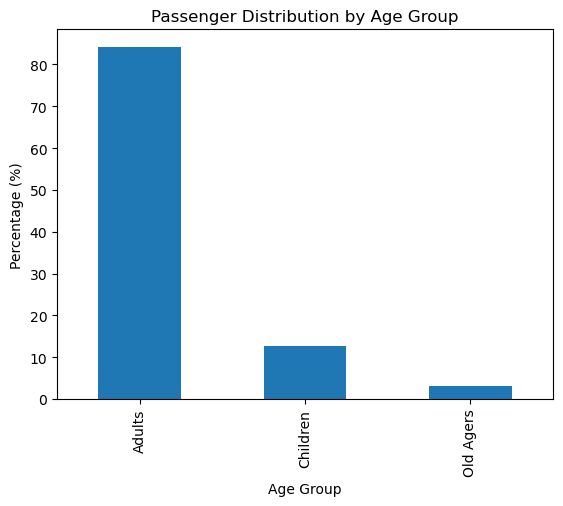

In [145]:
age_percentage.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.title('Passenger Distribution by Age Group')
plt.show()

In [152]:
survival_by_age_group = df.groupby('Age_Group',observed=False)['Survived'].mean() * 100

survival_by_age_group 

Age_Group
Children     53.982301
Adults       36.533333
Old Agers    25.000000
Name: Survived, dtype: float64

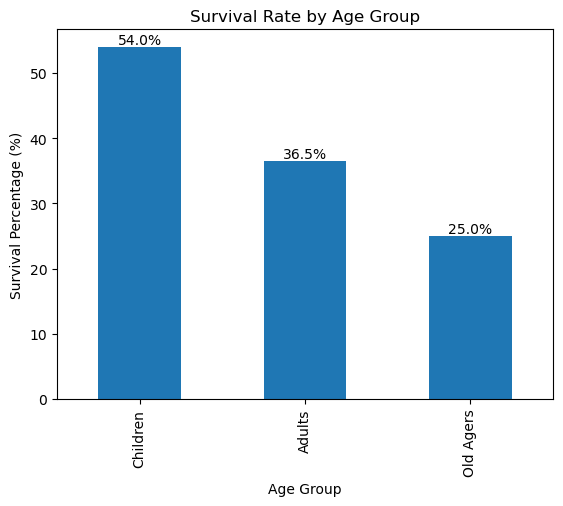

In [158]:
plt.figure()
ax = survival_by_age_group.plot(kind='bar')

plt.xlabel('Age Group')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Rate by Age Group')

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.show()

This reveals that Children have highest survival rate and old agers have lowest survival rate. It seems survival rate is decreasing with age

5.	Which fare groups (low, mid, high) had better survival?

In [160]:
df['Fare'].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891, dtype: float64

In [163]:
bins = [0, 50, 150, df['Fare'].max()]
labels = ['Low', 'Mid', 'High']

df['Fare_Category'] = pd.cut(df['Fare'], bins=bins, labels=labels)

In [164]:
df['Fare_Category'].value_counts()


Fare_Category
Low     716
Mid     131
High     29
Name: count, dtype: int64

In [165]:
(df['Fare_Category'].value_counts(normalize=True) * 100).round(2)


Fare_Category
Low     81.74
Mid     14.95
High     3.31
Name: proportion, dtype: float64

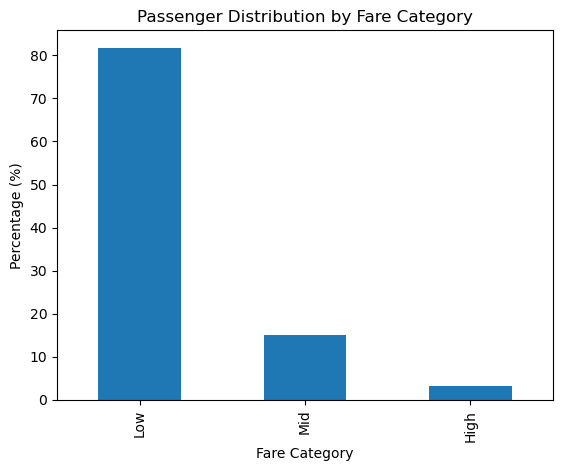

In [166]:
fare_pct = df['Fare_Category'].value_counts(normalize=True) * 100

plt.figure()
fare_pct.plot(kind='bar')
plt.xlabel('Fare Category')
plt.ylabel('Percentage (%)')
plt.title('Passenger Distribution by Fare Category')
plt.show()

In [169]:
survival_by_fare = df.groupby('Fare_Category',observed=False)['Survived'].mean() * 100
survival_by_fare

Fare_Category
Low     19.805195
Mid     40.277778
High    55.932203
Name: Survived, dtype: float64

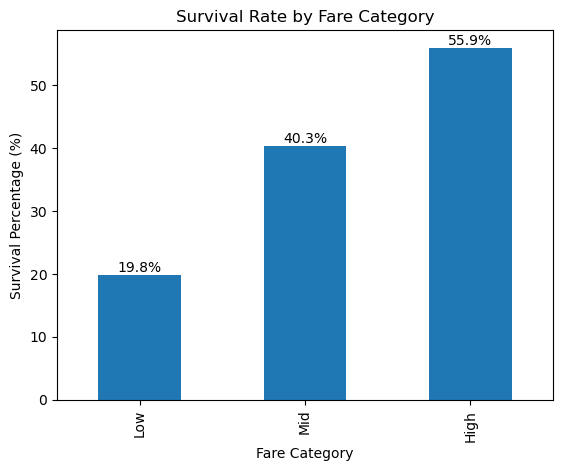

In [170]:

plt.figure()
ax = survival_by_fare.plot(kind='bar')

plt.xlabel('Fare Category')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Rate by Fare Category')

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.show()

“Fare category shows a strong positive relationship with survival. Passengers paying higher fares had significantly better survival chances due to proximity to lifeboats and class privilege.”

# Conclusions

Following are the insights from tragic incident of titanic drowning:

1] Only 38.38 percent passengers were saved. From the background studies it is found that available life boats could only accommodate only 50% of total passengers. this is sheer negligence to safety protocols. For ferry managers it is of utmost importance to have enough number of life boats to accommodate all passengers in order to prevent loss of lives.

2] Analysis reveals 74% of females survived and only 18% of males survived. This shows male prioritize their women and children over their lives, In the endeavour of securing their women and children they put their lives under risks and therefore such a low survival percent.

3] Class 1 has highest survival rate due to its proximity with life boats and minimum obstructions to reach them.

4] The analysis clearly shows that survival rate of children was highest 54% then adult's survival rate 36% and old passenger’s survival rate was lowest 25%. Amidst catastrophe due to old age passengers couldn't show agility to get out. on the other hand children were saved due women children first policy and agility.

5] High fare group passengers were in class 1 which was in proximity with deck and life boats, As titanic had life boats with only 50% capacity majority of these boats were occupied by high fare group passengers. moreover, Class 1 had more families sailing containing relatively larger number of women and children therefore this class was also benefited by demographics. Also cabin crew coordinated well during evacuating passengers of class because that was initial phase of catastrophe.
